In [1]:
from __future__ import print_function
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.preprocessing.text import Tokenizer, one_hot
from sklearn.metrics.pairwise import cosine_distances
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import nltk
import numpy as np
import operator

C:\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [8]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\timscarfe\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [2]:
np.random.seed(42)

BATCH_SIZE = 128
NUM_EPOCHS = 20

lines = []
fin = open("alicewonderland.txt", "rb")
for line in fin:
    line = line.strip().decode("ascii", "ignore").encode("utf-8").decode("utf-8")
    if len(line) == 0:
        continue
    lines.append(line)
fin.close()

In [3]:
len(lines)

2791

In [4]:
lines

["Project Gutenberg's Alice's Adventures in Wonderland, by Lewis Carroll",
 'This eBook is for the use of anyone anywhere at no cost and with',
 'almost no restrictions whatsoever.  You may copy it, give it away or',
 're-use it under the terms of the Project Gutenberg License included',
 'with this eBook or online at www.gutenberg.org',
 "Title: Alice's Adventures in Wonderland",
 'Author: Lewis Carroll',
 'Posting Date: June 25, 2008 [EBook #11]',
 'Release Date: March, 1994',
 '[Last updated: December 20, 2011]',
 'Language: English',
 'Character set encoding: ASCII',
 "*** START OF THIS PROJECT GUTENBERG EBOOK ALICE'S ADVENTURES IN WONDERLAND ***",
 "ALICE'S ADVENTURES IN WONDERLAND",
 'Lewis Carroll',
 'THE MILLENNIUM FULCRUM EDITION 3.0',
 'CHAPTER I. Down the Rabbit-Hole',
 'Alice was beginning to get very tired of sitting by her sister on the',
 'bank, and of having nothing to do: once or twice she had peeped into the',
 'book her sister was reading, but it had no pictures or c

In [5]:
sents = nltk.sent_tokenize(" ".join(lines))

tokenizer = Tokenizer(5000)  # use top 5000 words only
tokens = tokenizer.fit_on_texts(sents)
vocab_size = len(tokenizer.word_counts) + 1

xs = []
ys = []
for sent in sents:
    embedding = one_hot(sent, vocab_size)
    triples = list(nltk.trigrams(embedding))
    w_lefts = [x[0] for x in triples]
    w_centers = [x[1] for x in triples]
    w_rights = [x[2] for x in triples]
    xs.extend(w_centers)
    ys.extend(w_lefts)
    xs.extend(w_centers)
    ys.extend(w_rights)

In [14]:
xs


[285,
 781,
 885,
 626,
 3173,
 2367,
 2827,
 2312,
 274,
 109,
 399,
 1380,
 3186,
 3150,
 2687,
 2676,
 1995,
 1090,
 287,
 864,
 1721,
 1933,
 2609,
 287,
 1821,
 285,
 781,
 885,
 626,
 3173,
 2367,
 2827,
 2312,
 274,
 109,
 399,
 1380,
 3186,
 3150,
 2687,
 2676,
 1995,
 1090,
 287,
 864,
 1721,
 1933,
 2609,
 287,
 1821,
 2107,
 1255,
 151,
 2295,
 151,
 2535,
 415,
 1632,
 3150,
 151,
 1082,
 3186,
 2179,
 2687,
 3186,
 2430,
 2156,
 2115,
 1430,
 1933,
 274,
 109,
 415,
 3125,
 1090,
 2850,
 2156,
 1827,
 2898,
 781,
 885,
 626,
 3173,
 817,
 2827,
 2312,
 1076,
 3260,
 353,
 3299,
 125,
 109,
 3283,
 412,
 3260,
 3134,
 1551,
 209,
 2934,
 658,
 1679,
 1041,
 1453,
 2727,
 1122,
 2505,
 1206,
 1349,
 2825,
 2687,
 274,
 2430,
 2156,
 109,
 781,
 885,
 626,
 3173,
 781,
 885,
 626,
 3173,
 2827,
 2312,
 3186,
 2303,
 1954,
 2708,
 1351,
 1473,
 836,
 2107,
 1255,
 151,
 2295,
 151,
 2535,
 415,
 1632,
 3150,
 151,
 1082,
 3186,
 2179,
 2687,
 3186,
 2430,
 2156,
 2115,
 1430,


In [41]:
vocab_size

3338

In [35]:
ohe = OneHotEncoder(n_values=vocab_size)
X = ohe.fit_transform(np.array(xs).reshape(-1, 1)).todense()
Y = ohe.fit_transform(np.array(ys).reshape(-1, 1)).todense()
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.3,
                                                random_state=42)

print(Xtrain.shape, Xtest.shape, Ytrain.shape, Ytest.shape)

model = Sequential()
model.add(Dense(300, input_shape=(vocab_size,)))
model.add(Activation("relu"))
model.add(Dropout(0.7))
model.add(Dense(vocab_size))
model.add(Activation("softmax"))

model.compile(optimizer="rmsprop", loss="categorical_crossentropy",
              metrics=["accuracy"])

history = model.fit(Xtrain, Ytrain, batch_size=BATCH_SIZE,
                    epochs=NUM_EPOCHS, verbose=1,
                    validation_data=(Xtest, Ytest))

(38525, 3338) (16511, 3338) (38525, 3338) (16511, 3338)
Train on 38525 samples, validate on 16511 samples
Epoch 1/20
38525/38525 [==============================] - 4s 110us/step - loss: 6.4479 - acc: 0.0559 - val_loss: 6.0059 - val_acc: 0.0581
Epoch 2/20
38525/38525 [==============================] - 4s 104us/step - loss: 5.9694 - acc: 0.0572 - val_loss: 5.9678 - val_acc: 0.0581
Epoch 3/20
38525/38525 [==============================] - 4s 104us/step - loss: 5.9149 - acc: 0.0613 - val_loss: 5.9393 - val_acc: 0.0665
Epoch 4/20
38525/38525 [==============================] - 4s 104us/step - loss: 5.8732 - acc: 0.0658 - val_loss: 5.9121 - val_acc: 0.0685
Epoch 5/20
38525/38525 [==============================] - 4s 104us/step - loss: 5.8301 - acc: 0.0693 - val_loss: 5.8885 - val_acc: 0.0716
Epoch 6/20
38525/38525 [==============================] - 4s 104us/step - loss: 5.7999 - acc: 0.0727 - val_loss: 5.8680 - val_acc: 0.0769
Epoch 7/20
38525/38525 [==============================] - 4s 103us

In [38]:
from keras.utils import plot_model
plot_model(model, to_file='simple-sg-softmax.png')

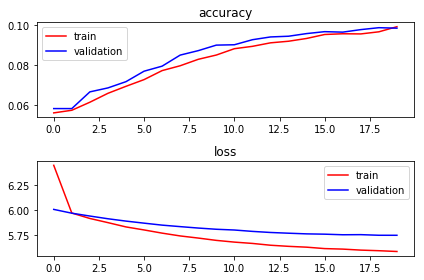

In [36]:


# plot loss function
plt.subplot(211)
plt.title("accuracy")
plt.plot(history.history["acc"], color="r", label="train")
plt.plot(history.history["val_acc"], color="b", label="validation")
plt.legend(loc="best")

plt.subplot(212)
plt.title("loss")
plt.plot(history.history["loss"], color="r", label="train")
plt.plot(history.history["val_loss"], color="b", label="validation")
plt.legend(loc="best")

plt.tight_layout()
plt.show()

In [13]:
# evaluate model
score = model.evaluate(Xtest, Ytest, verbose=1)
print("Test score: {:.3f}, accuracy: {:.3f}".format(score[0], score[1]))

# using the word2vec model
word2idx = tokenizer.word_index
idx2word = {v: k for k, v in word2idx.items()}

# retrieve the weights from the first dense layer. This will convert
# the input vector from a one-hot sum of two words to a dense 300
# dimensional representation
W, b = model.layers[0].get_weights()

16511/16511 [==============================] - 1s 60us/step
Test score: 5.666, accuracy: 0.107


In [14]:
idx2emb = {}
for word in word2idx.keys():
    wid = word2idx[word]
    vec_in = ohe.fit_transform(np.array(wid)).todense()
    vec_emb = np.dot(vec_in, W)
    idx2emb[wid] = vec_emb

for word in ["stupid", "alice", "succeeded"]:
    wid = word2idx[word]
    source_emb = idx2emb[wid]
    distances = []
    for i in range(1, vocab_size):
        if i == wid:
            continue
        target_emb = idx2emb[i]
        distances.append(((wid, i),
                         cosine_distances(source_emb, target_emb)))
    sorted_distances = sorted(distances, key=operator.itemgetter(1))[0:10]
    predictions = [idx2word[x[0][1]] for x in sorted_distances]
    print("{:s} => {:s}".format(word, ", ".join(predictions)))

stupid => 'some, raw, sharks, fancied, scroll, includes, bent, room, presents, started
alice => literary, quarrel, gloves, compilation, dish, standing, course, 'his, damaged, site
succeeded => hand, 'just, shoulder, hat, fell, shall, ornamented, aged, caterpillar's, chapter


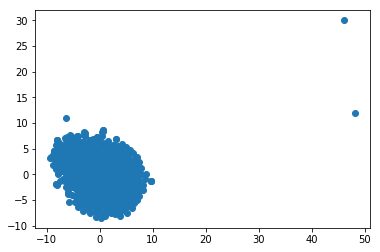

In [45]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)
np.set_printoptions(suppress=True)
Y = tsne.fit_transform(W[1:1000,:])

x_coords = Y[:, 0]
y_coords = Y[:, 1]
# display scatter plot
plt.scatter(x_coords, y_coords)


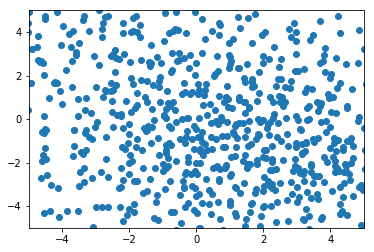

In [47]:
plt.xlim(-5, 5)
plt.ylim(-5,5)
plt.scatter(x_coords, y_coords)

In [ ]:
for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')